# Линейная регрессия

### Каждый вопрос даёт 0-3 балла.

Сохраните ваше решение в формате Name_Surname.ipynb, например Ivan_Ivanov.ipynb

В данном задании мы рассмотрим стандартный датасет для задачи регрессии Boston Housing, в котором необходимо предсказать стоимость недвижимости по 13 признакам.

Датасет достаточно просто загрузить из библиотеки scikit-learn:

In [1]:
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams["figure.figsize"] = (8, 4)  # default size of all figures

In [3]:
import seaborn as sns

sns.set(style="whitegrid")

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

In [4]:
def pairplot(df, target):
    ncol, nrow = 7, df.shape[1] // 7 + (df.shape[1] % 7 > 0)
    plt.figure(figsize=(ncol * 4, nrow * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(nrow, ncol, i + 1)
        plt.scatter(df[feature], target, s=10, marker="o", alpha=0.6)
        plt.xlabel(feature)
        if i % ncol == 0:
            plt.ylabel("target")

In [5]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/n6/c7nnl1296qv17rrpz748kq380000gq/T/ipykernel_45408/3257800236.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [6]:
"""
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per $10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)**2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population

TARGET:
* MEDV     Median value of owner-occupied homes in $1000's
"""

print()

In [7]:
df = pd.DataFrame(
    data, columns="CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT".split()
)

In [8]:
y = target

In [9]:
print(data["DESCR"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Разделим выборку на обчающую и тестовую в отоншении 8/2:

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    df, y, train_size=0.8, random_state=42
)

__Задание 1.__ Обучение линейной регрессии.

Обучите стандартную линейную регрессию, а также с $L_1$ и $L_2$ регуляризаторами (используйте параметры по умолчанию). Посчитайте метрику $R^2$ для каждого метода (встроенный метод .score).

In [12]:
#  Your code here
from sklearn.linear_model import Ridge, Lasso, LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

model_base = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()

model_dict = {"model_base": model_base, "ridge": model_ridge, "lasso": model_lasso}

for name, model in  model_dict.items():
    model.fit(x_train, y_train)
    print(f"Model: {name}")
    print(f"R^2 on train: {model.score(x_train, y_train)}")
    print(f"R^2 on test: {model.score(x_test, y_test)}", end="\n\n")
    

Model: model_base
R^2 on train: 0.7508856358979672
R^2 on test: 0.6687594935356347

Model: ridge
R^2 on train: 0.7487825119234438
R^2 on test: 0.6662221670168522

Model: lasso
R^2 on train: 0.6959153721670908
R^2 on test: 0.6671453631686304



__Задание 2.__ Подбор гиперпараметров.


Для Lasso- и Ridge-регресий (используйте `RidgeCV` и `LassoCV`) подберите коэффициет регуляризации по обучающей выборке с помощью кросс-валидации. Параметры для перебора возьмите по логарифмической сетке от $10^{-6}$ до $10^6$, используйте `np.logspace`).
Также посчитайте метрику $R^2$ для тестовой выборки и сравните с предыдущими результатами. Заметно ли изменилось качество?

In [15]:
alphas = np.logspace(-6, 6, 100)
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(x_train, y_train)
print(f"Ridge\nAlpha = {ridge_cv.alpha_ }")
print(f"R^2 on train: {ridge_cv.score(x_train, y_train)}")
print(f"R^2 on test: {ridge_cv.score(x_test, y_test)}", end="\n\n")

Ridge
Alpha = 0.02310129700083158
R^2 on train: 0.7508821385162993
R^2 on test: 0.6687378938713827



In [14]:
alphas = np.logspace(-6, 6, 100)
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(x_train, y_train)
print(f"Alpha = {lasso_cv.alpha_ }")
print(f"R^2 on train: {lasso_cv.score(x_train, y_train)}")
print(f"R^2 on test: {lasso_cv.score(x_test, y_test)}", end="\n\n")

Alpha = 1e-06
R^2 on train: 0.7508856358937331
R^2 on test: 0.6687595306431893



__Ответ__: сильного изменения в качестве нет, связяно с тем что коэф регуризации подобрался почти нулевой, что говорит о том что это та же обычная линейная регрессия


Пстройте график зависимости $R^2$ для обучающей выборки и на кросс-валидации в зависимости от значения гиперпараметра. 

По оси X должна быть логарифмическая шкала $10^{-6}$ до $10^6$.

In [22]:
#  Your code here
# ...
from sklearn.model_selection import GridSearchCV


def searcher_alpha(model, search_space, name_of_parameter, descr, x_train=x_train, x_test=x_test):
    searcher = GridSearchCV(model, search_space, scoring="r2", cv=5, n_jobs=-1)
    # searcher = LassoCV(eps=1e-12, n_alphas=100, alphas=alphas)
    searcher.fit(x_train, y_train)

    print(f"R^2 on train: {searcher.score(x_train, y_train)}")
    print(f"R^2 on test: {searcher.score(x_test, y_test)}", end="\n\n")

    best_alpha = searcher.best_params_[name_of_parameter]
    print("Best alpha = %.4f" % best_alpha)
    plt.title(descr)
    plt.plot(alphas, searcher.cv_results_["mean_test_score"])
    plt.xscale("log")
    plt.xlabel("alpha")
    plt.ylabel("R2")

    return searcher


alphas = np.logspace(-6, 6, 100)
name_of_parameter = "alpha"
search_space = [{name_of_parameter: alphas}]

R^2 on train: 0.7508856358979605
R^2 on test: 0.6687594927462259

Best alpha = 0.0000


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-05, 6.57933225e-05,
       8.69749003e-05, 1.14975700e-04, 1.5199...
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])}],
             scoring='r2')

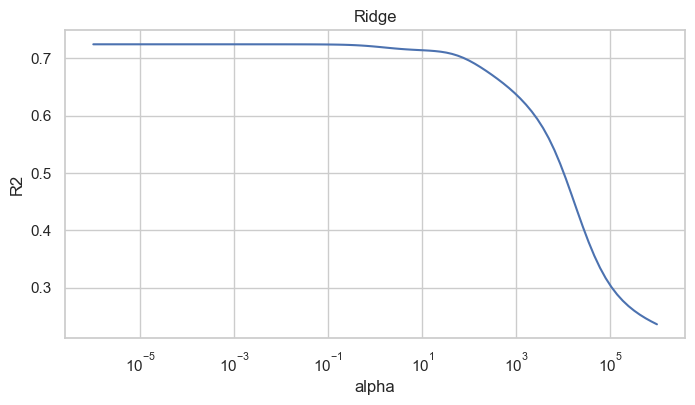

In [23]:
ridge = Ridge()
searcher_alpha(ridge, search_space, name_of_parameter, descr="Ridge")


R^2 on train: 0.7508856358937331
R^2 on test: 0.6687595306431893

Best alpha = 0.0000


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid=[{'alpha': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-05, 6.57933225e-05,
       8.69749003e-05, 1.14975700e-04, 1.5199...
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])}],
             scoring='r2')

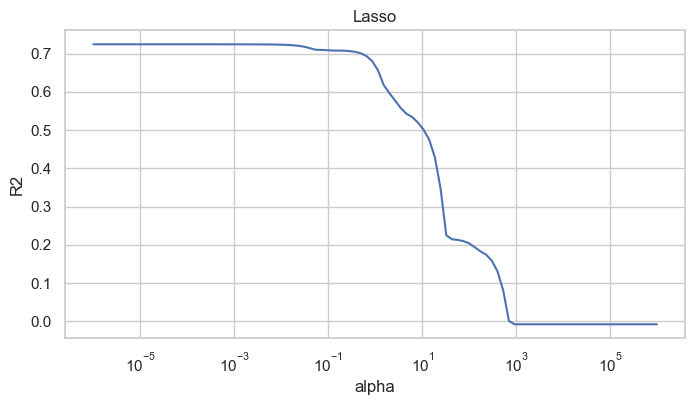

In [24]:
lasso = Lasso()
searcher_alpha(lasso, search_space, name_of_parameter, descr="Lasso")

В какой момент происходит недообучение? Почему?

__Ответ__: в случае ridge недообучение происходит при alpha порядка 10^2 когда качество начинает сильно падать. В случае lasso падение качества начинается на 10^0. Так же заметно что качество нулевое в случае коэфа 10^3, в этот момент все веса зануляются

Для Lasso также постройте график зависимости количества ненулевых весов.

In [25]:
eps = 1e-6

In [27]:
#  Your code here
# ...
from sklearn.model_selection import cross_val_score

result = []
for alpha in alphas:
    lasso = LassoCV(alphas=[alpha])
    lasso.fit(x_train, y_train)
    num_of_zeros_coef = (abs(lasso.coef_) < eps).sum()
    result.append(num_of_zeros_coef)

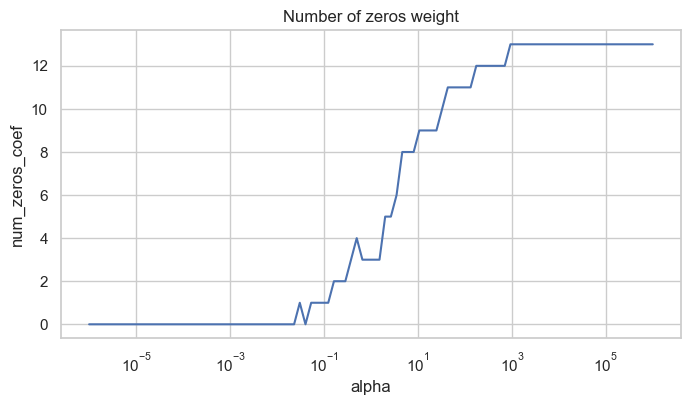

In [30]:
plt.title("Number of zeros weight")
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("num_zeros_coef")
plt.plot(alphas, result)

---

## Подготовка данных

Как вы могли заметить, большого прироста качества с помощью подбора коэфициента регуляризации добиться не удалось. Поэтому прежде чем бросаться обучать модели, необходимо изучить и предобработать данные.

__Задание 3.__ Нормализация.

Зачастую признаки в сырых данных имеют разный масштаб. Попробуйте применить нормализацию к данным, сравните качество. Заметно ли изменение?

Попробуйте Pipeline вместе с StandardScaler и MinMaxScaler. Что лучше?

In [31]:
#  Your code here
# ...

In [32]:
columns = x_train.columns

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_transformer_standart = ColumnTransformer([
    ('scaling', StandardScaler(), columns)
])

column_transformer_min_max = ColumnTransformer([
    ('scaling', MinMaxScaler(), columns)
])

R^2 on train: 0.7507858929425981
R^2 on test: 0.6679726430166592

Best alpha = 2.6561


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'))])),
                                       ('regression', Ridge())]),
             n_jobs=-1,
             param_grid=[{'regression__alpha': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.3...
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])}],
             scoring='r2')

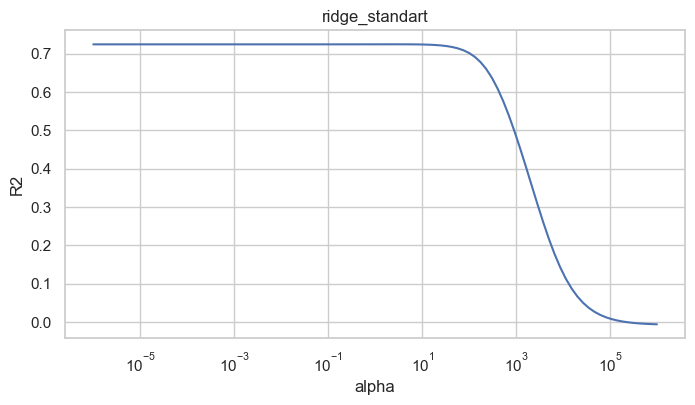

In [35]:
# Ridge standart
pipeline_ridge_standart = Pipeline(steps=[
    ('scaling', column_transformer_standart),
    ('regression', Ridge())
])

name_of_parameter = "regression__alpha"
search_space = [{name_of_parameter: alphas}]
searcher_alpha(pipeline_ridge_standart, search_space,name_of_parameter,  descr="ridge_standart")

R^2 on train: 0.750166057103644
R^2 on test: 0.6728170277755358

Best alpha = 0.3765


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         MinMaxScaler(),
                                                                         Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'))])),
                                       ('regression', Ridge())]),
             n_jobs=-1,
             param_grid=[{'regression__alpha': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.310...
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])}],
             scoring='r2')

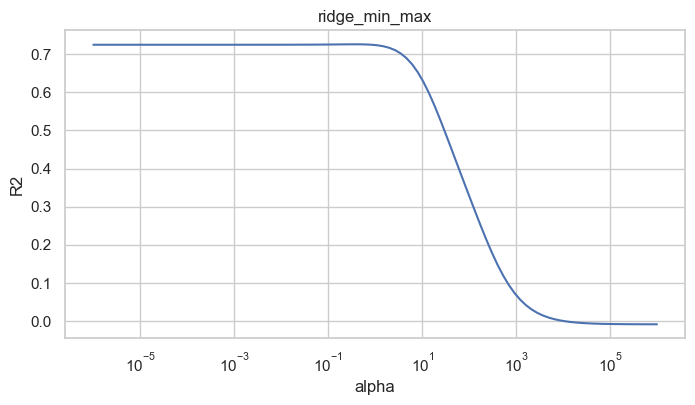

In [36]:
# Ridge min max
pipeline_ridge_min_max = Pipeline(steps=[
    ('scaling', column_transformer_min_max),
    ('regression', Ridge())
])
name_of_parameter = "regression__alpha"
search_space = [{name_of_parameter: alphas}]
searcher_alpha(pipeline_ridge_min_max, search_space, name_of_parameter, descr="ridge_min_max")

R^2 on train: 0.7508856358971424
R^2 on test: 0.6687594476459651

Best alpha = 0.0000


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'))])),
                                       ('regression', Lasso())]),
             n_jobs=-1,
             param_grid=[{'regression__alpha': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.3...
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])}],
             scoring='r2')

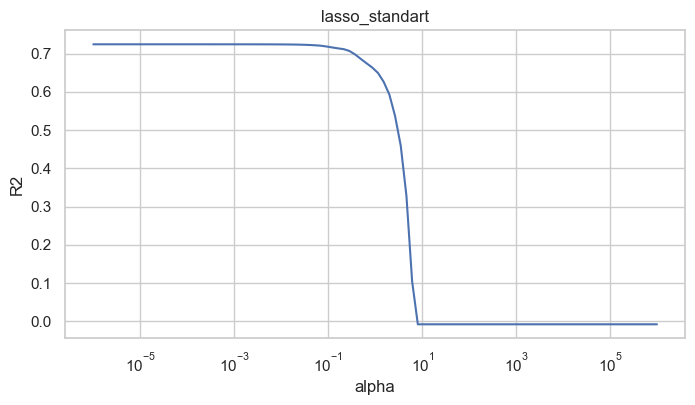

In [37]:
# Lasso standart
pipeline_lasso_standart = Pipeline(steps=[
    ('scaling', column_transformer_standart),
    ('regression', Lasso())
])

name_of_parameter = "regression__alpha"
search_space = [{name_of_parameter: alphas}]
searcher_alpha(pipeline_lasso_standart, search_space,name_of_parameter,  descr="lasso_standart")

R^2 on train: 0.7508856358850164
R^2 on test: 0.6687595941441697

Best alpha = 0.0000


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         MinMaxScaler(),
                                                                         Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'))])),
                                       ('regression', Lasso())]),
             n_jobs=-1,
             param_grid=[{'regression__alpha': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.310...
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])}],
             scoring='r2')

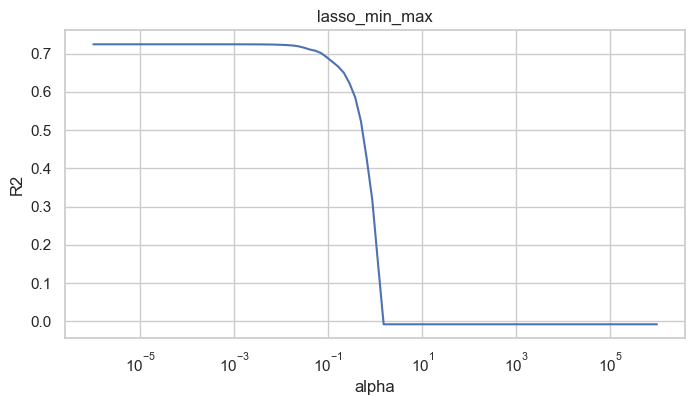

In [38]:
# Lasso min max
pipeline_lasso_min_max = Pipeline(steps=[
    ('scaling', column_transformer_min_max),
    ('regression', Lasso())
])
name_of_parameter = "regression__alpha"
search_space = [{name_of_parameter: alphas}]
searcher_alpha(pipeline_lasso_min_max, search_space, name_of_parameter, descr="lasso_min_max")

Сравните оптимальное значение коэффициента регуляризации для Ridge-регрессии до и после нормализации. Изменилось ли оно? Предположите почему так могло произойти.

In [ ]:
#  Your code here
# ...

__Ответ:__ для Ridge  увеличилось на порядок для min_max и на два порядка для standart_scale. При нормализации данных значения уменьшились и соответсвенно оптимальный коэфициент для регуляризации увеличился

Ridge : alpha = 0.0231

Ridge + min max: alpha = 0.3765

Ridge + standart: alpha = 2.6561




__Задание 4.__ Новые признаки.

Полезным также бывает посмотреть как целевая переменная зависит от каждого признака.

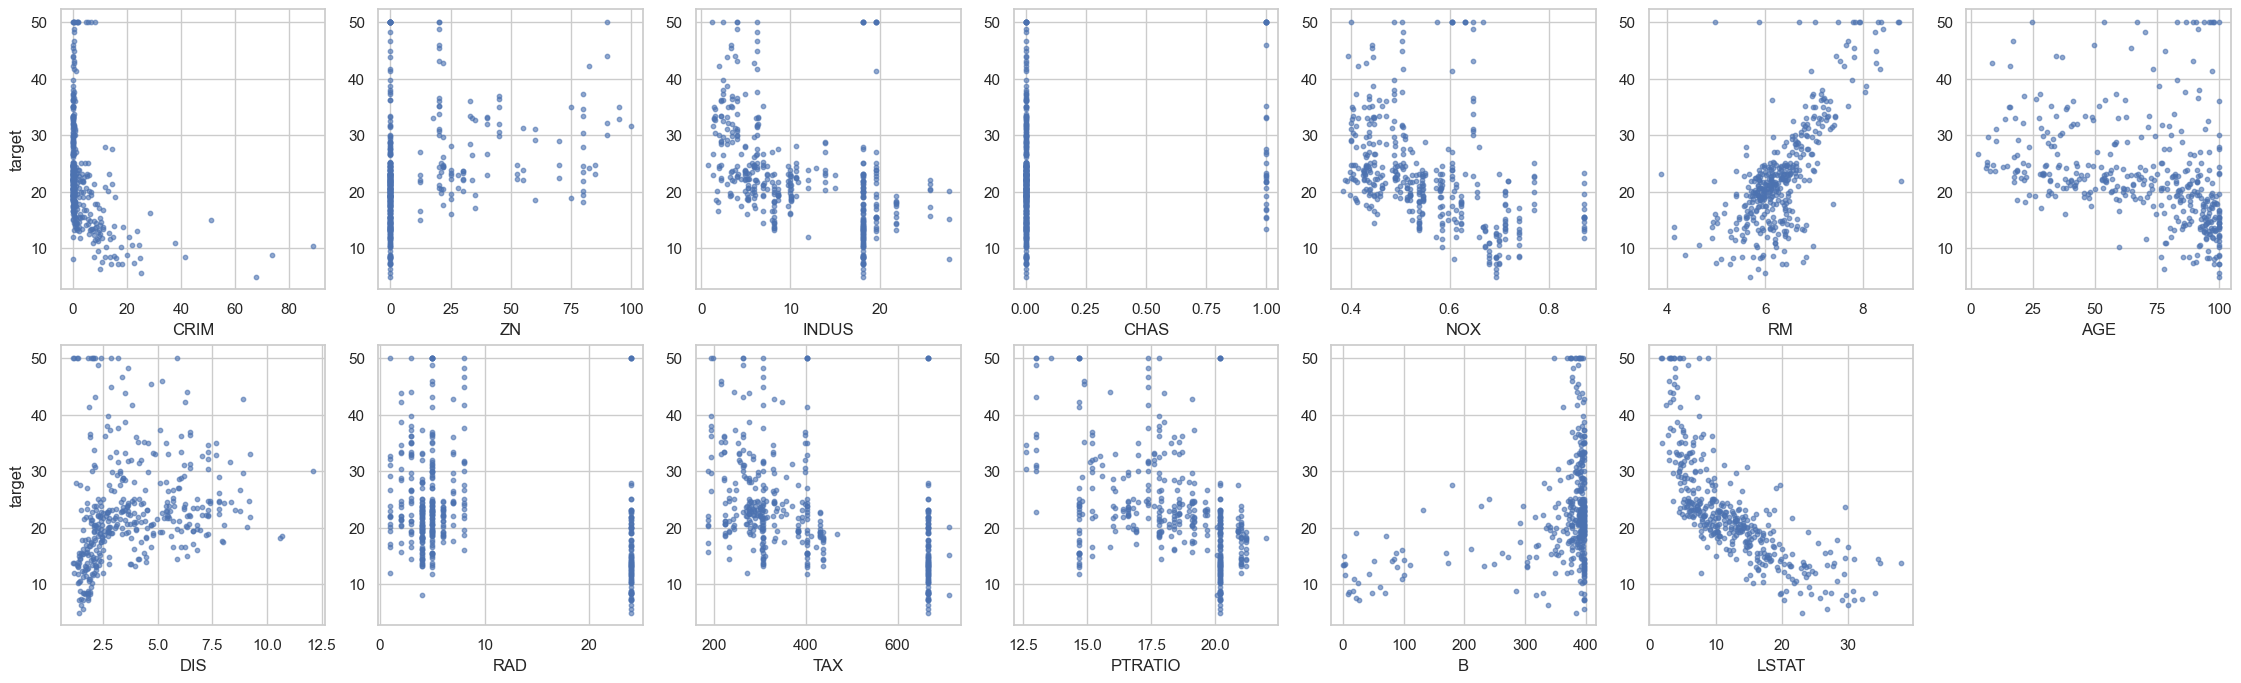

In [39]:
pairplot(x_train, y_train)

Обратите внимение на зависимость цены от признака LSTAT. Является ли эта зависимость линейной? Преобразуйте эту переменную по правилу
$u\to-\ln u$. 
Каким стал коэффициент $R^2$ для `MinMaxScaler+RidgeCV` с автоподбором коэффициента регуляризации по сетке $10^{-6},...,10^6$, используя `np.logspace`?

In [40]:
x_train_change_lstat = x_train.copy()
x_train_change_lstat.LSTAT = x_train_change_lstat.LSTAT.apply(lambda x: -np.log(x))

x_test_change_lstat = x_test.copy()
x_test_change_lstat.LSTAT = x_test_change_lstat.LSTAT.apply(lambda x: -np.log(x))

In [41]:
degree_score_train = {}
degree_score_test = {}

In [43]:
x_train_change_lstat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,-3.215269
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,-2.136531
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,-2.057963
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,-3.148024
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,-2.423031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,-2.926382
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,-2.564949
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,-1.790091
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,-3.147165


In [44]:
pipeline_ridge_min_max

Pipeline(steps=[('scaling',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'))])),
                ('regression',
                 RidgeCV(alphas=array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-...
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])))])

In [47]:
# Ridge min max
pipeline_ridge_min_max = Pipeline(steps=[
    ('scaling', column_transformer_min_max),
    ('regression', RidgeCV(alphas))
])
pipeline_ridge_min_max.fit(x_train_change_lstat, y_train)

Pipeline(steps=[('scaling',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'))])),
                ('regression',
                 RidgeCV(alphas=array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-...
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])))])

In [61]:
degree_score_train[1] =  pipeline_ridge_min_max.score(x_train_change_lstat, y_train)
degree_score_test[1] = pipeline_ridge_min_max.score(x_test_change_lstat, y_test)

In [62]:
print("RidgeCV + min_max + change_lstat")
print("Train score:", degree_score_train[1])
print("Test score:", degree_score_test[1])

RidgeCV + min_max + change_lstat
Train score: 0.7993873475232838
Test score: 0.7449645566622562


__Ответ:__  
Train score: 0.7993873475232838

Test score: 0.7449645566622562


Помимо преобразований отдельных признаков полезными бывают их попарные взаимодействия. Воспользуйтесь PolynomialFeatures, чтобы добавить попарные произведения и квадраты всех признаков. Обучите предыдущую модель и посчитайте $R^2$ на тесте. Сильно ли изменилось качество?

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
#  Your code here
# ...
x_train_poly_2 = pd.DataFrame(PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train_change_lstat))
x_test_poly_2 = pd.DataFrame(PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test_change_lstat))

x_train_poly_3 = pd.DataFrame(PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_train_change_lstat))
x_test_poly_3= pd.DataFrame(PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_test_change_lstat))

x_train_poly_4 = pd.DataFrame(PolynomialFeatures(degree=4, include_bias=False).fit_transform(x_train_change_lstat))
x_test_poly_4= pd.DataFrame(PolynomialFeatures(degree=4, include_bias=False).fit_transform(x_test_change_lstat))

x_train_poly_5 = pd.DataFrame(PolynomialFeatures(degree=5, include_bias=False).fit_transform(x_train_change_lstat))
x_test_poly_5= pd.DataFrame(PolynomialFeatures(degree=5, include_bias=False).fit_transform(x_test_change_lstat))

x_train_poly_6 = pd.DataFrame(PolynomialFeatures(degree=6, include_bias=False).fit_transform(x_train_change_lstat))
x_test_poly_6 = pd.DataFrame(PolynomialFeatures(degree=6, include_bias=False).fit_transform(x_test_change_lstat))


In [78]:
# Для эксперимента проверил будет ли разница от использония RidgeCV и обычного GridSearch
column_transformer_min_max_poly = ColumnTransformer([
    ('scaling', MinMaxScaler(), x_train_poly_2.columns)
])

pipeline_ridge_min_max = Pipeline(steps=[
    ('scaling', column_transformer_min_max_poly),
    ('regression', RidgeCV())
])
pipeline_ridge_min_max.fit(x_train_poly_2, y_train)

print("Using RidgeCV", pipeline_ridge_min_max.score(x_train_poly_2, y_train), pipeline_ridge_min_max.score(x_test_poly_2, y_test))


Using RidgeCV 0.9155736408506717 0.8388485723305255


R^2 on train: 0.7992088594296963
R^2 on test: 0.7448755418224285

Best alpha = 0.2848


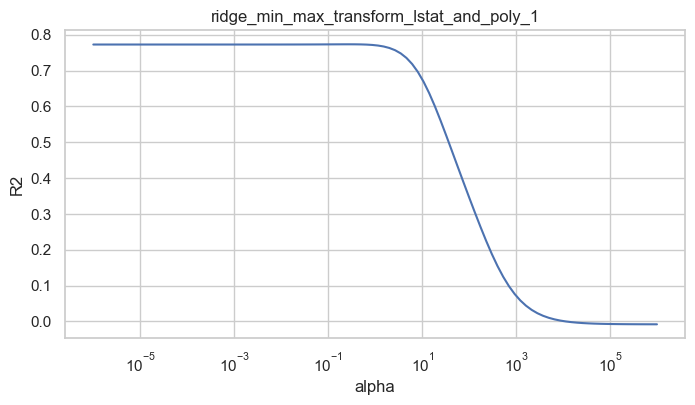

In [81]:
# Ridge min max, lstat, poly=1()
column_transformer_min_max_poly = ColumnTransformer([
    ('scaling', MinMaxScaler(), x_train_change_lstat.columns)
])

pipeline_ridge_min_max = Pipeline(steps=[
    ('scaling', column_transformer_min_max_poly),
    ('regression', Ridge())
])
name_of_parameter = "regression__alpha"
search_space = [{name_of_parameter: alphas}]
best_model_1 = searcher_alpha(pipeline_ridge_min_max, search_space,
               name_of_parameter, descr="ridge_min_max_transform_lstat_and_poly_1",
               x_train=x_train_change_lstat,
               x_test=x_test_change_lstat)

R^2 on train: 0.931005706643414
R^2 on test: 0.8347850574712636

Best alpha = 0.0231


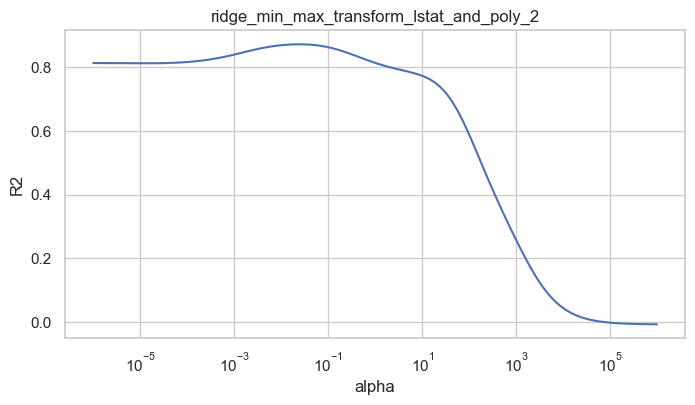

In [87]:
# Ridge min max, lstat, poly
column_transformer_min_max_poly = ColumnTransformer([
    ('scaling', MinMaxScaler(), x_train_poly_2.columns)
])

pipeline_ridge_min_max = Pipeline(steps=[
    ('scaling', column_transformer_min_max_poly),
    ('regression', Ridge())
])
name_of_parameter = "regression__alpha"
search_space = [{name_of_parameter: alphas}]
best_model_2 = searcher_alpha(pipeline_ridge_min_max, search_space,
               name_of_parameter, descr="ridge_min_max_transform_lstat_and_poly_2",
               x_train=x_train_poly_2,
               x_test=x_test_poly_2)

__Задание 5.__ Оптимальная архитектура, анализ.

При помощи `Pipeline` и `GridSearchSCV` выберите оптимальную архитектуру комбинируя различные методы нормализации, степень полинома в `PolynomialFeatures`, а также регуляризаторы. Для `Lasso` поставьте максимальное количество итераций больше значения по умолчанию, чтобы оптимищация сошлась.

In [304]:
#  Your code here
# ...


R^2 on train: 0.9377494181766461
R^2 on test: 0.8474922398871161

Best alpha = 0.2154


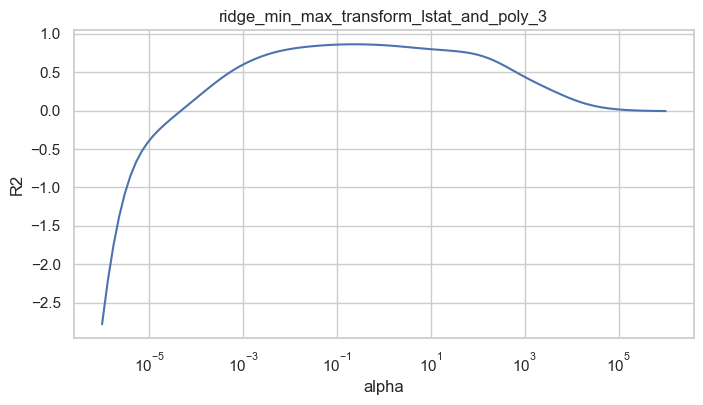

In [88]:
# Ridge min max, lstat, poly=3
column_transformer_min_max_poly = ColumnTransformer([
    ('scaling', MinMaxScaler(), x_train_poly_3.columns)
])

pipeline_ridge_min_max = Pipeline(steps=[
    ('scaling', column_transformer_min_max_poly),
    ('regression', Ridge())
])
name_of_parameter = "regression__alpha"
search_space = [{name_of_parameter: alphas}]
best_model_3 = searcher_alpha(pipeline_ridge_min_max, search_space,
               name_of_parameter, descr="ridge_min_max_transform_lstat_and_poly_3",
               x_train=x_train_poly_3,
               x_test=x_test_poly_3)


R^2 on train: 0.9392645858600975
R^2 on test: 0.8540769970177116

Best alpha = 1.1498


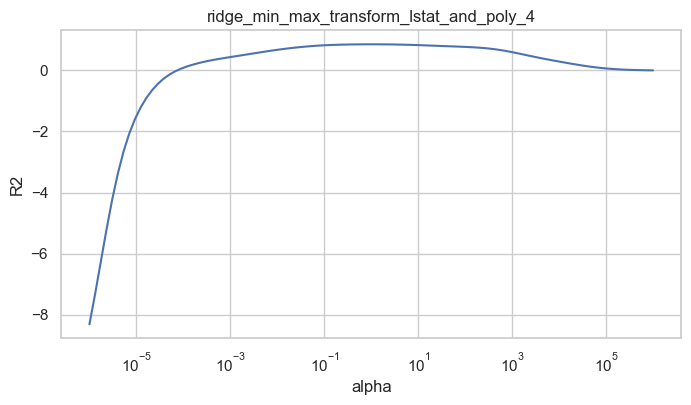

In [89]:
# Ridge min max, lstat, poly=4


column_transformer_min_max_poly = ColumnTransformer([
    ('scaling', MinMaxScaler(), x_train_poly_4.columns)
])

pipeline_ridge_min_max = Pipeline(steps=[
    ('scaling', column_transformer_min_max_poly),
    ('regression', Ridge())
])
name_of_parameter = "regression__alpha"
search_space = [{name_of_parameter: alphas}]
best_model_4 = searcher_alpha(pipeline_ridge_min_max, search_space,
               name_of_parameter, descr="ridge_min_max_transform_lstat_and_poly_4",
               x_train=x_train_poly_4,
               x_test=x_test_poly_4)


R^2 on train: 0.9465991070104509
R^2 on test: 0.8615169606502311

Best alpha = 2.6561


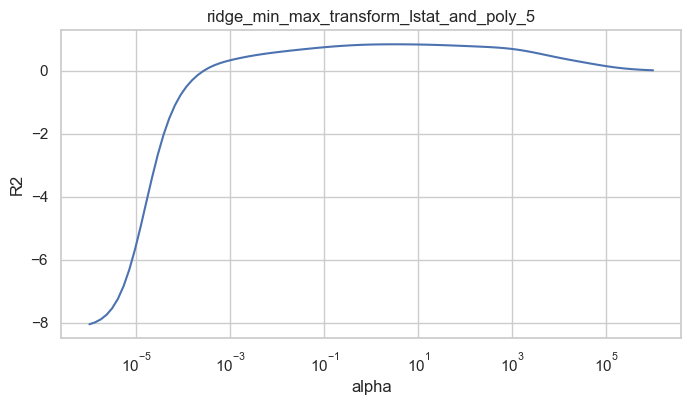

In [90]:
# Ridge min max, lstat, poly=4


column_transformer_min_max_poly = ColumnTransformer([
    ('scaling', MinMaxScaler(), x_train_poly_5.columns)
])

pipeline_ridge_min_max = Pipeline(steps=[
    ('scaling', column_transformer_min_max_poly),
    ('regression', Ridge())
])
name_of_parameter = "regression__alpha"
search_space = [{name_of_parameter: alphas}]
best_model_5 = searcher_alpha(pipeline_ridge_min_max, search_space,
               name_of_parameter, descr="ridge_min_max_transform_lstat_and_poly_5",
               x_train=x_train_poly_5,
               x_test=x_test_poly_5)


/Users/al.s.kim/study/env_study/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


R^2 on train: 0.9469524005148475
R^2 on test: 0.8644582474543138

Best alpha = 8.1113


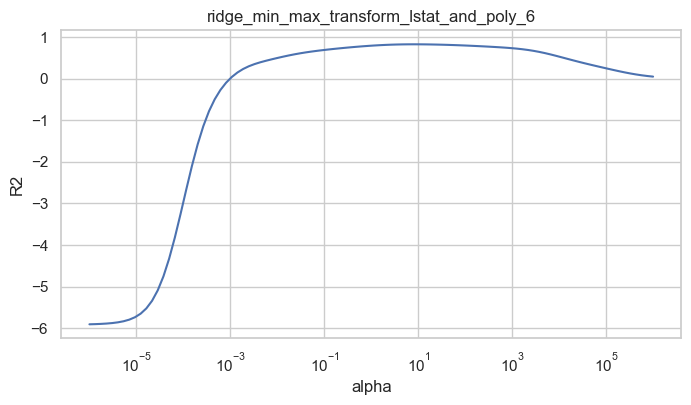

In [91]:
# Ridge min max, lstat, poly=4


column_transformer_min_max_poly = ColumnTransformer([
    ('scaling', MinMaxScaler(), x_train_poly_6.columns)
])

pipeline_ridge_min_max = Pipeline(steps=[
    ('scaling', column_transformer_min_max_poly),
    ('regression', Ridge())
])
name_of_parameter = "regression__alpha"
search_space = [{name_of_parameter: alphas}]
best_model_6 = searcher_alpha(pipeline_ridge_min_max, search_space,
               name_of_parameter, descr="ridge_min_max_transform_lstat_and_poly_6",
               x_train=x_train_poly_6,
               x_test=x_test_poly_6)


In [114]:
features[0]

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,...,87616.0,4913.6,117068.00,-651.691116,275.56,6565.300,-36.547542,156420.2500,-870.756203,4.847303
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,...,64516.0,4470.4,100812.60,-320.369659,309.76,6985.440,-22.198843,157529.6100,-500.609125,1.590872
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,...,505521.0,14291.1,277368.21,-2057.813957,404.01,7841.211,-58.174487,152185.8121,-1129.077079,8.376701
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,...,93025.0,5856.0,119227.55,-521.055247,368.64,7505.472,-32.800855,152810.6281,-667.821989,2.918555
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,...,443556.0,13453.2,256469.94,-1897.414614,408.04,7778.818,-57.549212,148294.3081,-1097.110201,8.116635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,...,443556.0,13453.2,19174.14,-2355.764605,408.04,581.558,-71.451119,828.8641,-101.835530,12.511671
98,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,...,443556.0,13453.2,18308.34,-1926.835026,408.04,555.298,-58.441543,755.7001,-79.532575,8.370292
99,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,...,443556.0,13453.2,23343.30,-2034.592793,408.04,708.010,-61.709871,1228.5025,-107.075792,9.332684
100,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,...,61009.0,4569.5,97809.53,-630.868065,342.25,7325.815,-47.251252,156808.0801,-1011.406659,6.523538


In [115]:
#  Your code here
# lasso min max, lstat, poly = 2


x_train_list_poly = [x_train_poly_2, x_train_poly_3, x_train_poly_4, x_train_poly_5, x_train_poly_6]
x_test_list_poly = [x_test_poly_2, x_test_poly_3,x_test_poly_4,x_test_poly_5,x_test_poly_6]
for i, features in enumerate(zip(x_train_list_poly, x_test_list_poly)):

    column_transformer_min_max_poly = ColumnTransformer([
        ('scaling', MinMaxScaler(), features[0].columns)
    ])
    
    pipeline_lasso_min_max = Pipeline(steps=[
        ('scaling', column_transformer_min_max_poly),
        ('regression', LassoCV(max_iter=10000000))
    ])
    
    pipeline_lasso_min_max.fit(features[0], y_train)
    print(f"Using LassoCV with poly {i+2}", pipeline_lasso_min_max.score(features[0], y_train),
                                            pipeline_lasso_min_max.score(features[1], y_test))

# name_of_parameter = "regression__alpha"
# search_space = [{name_of_parameter: alphas}]
# searcher_alpha(pipeline_ridge_min_max, search_space,
#                name_of_parameter, descr="lasso_min_max_transform_lstat_and_poly",
#                x_train=x_train_poly,
#                x_test=x_test_poly)

Using LassoCV with poly 2 0.927006170563215 0.8262581931262343
Using LassoCV with poly 3 0.9421386345042739 0.84554146330199
Using LassoCV with poly 4 0.9524205659721903 0.8593949454637021
Using LassoCV with poly 5 0.9554955886890475 0.8650559907774067
Using LassoCV with poly 6 0.9544698821084768 0.8661973604888524


Using LassoCV with poly 2 0.927 0.826

Using LassoCV with poly 3 0.942 0.845

Using LassoCV with poly 4 0.952 0.859

Using LassoCV with poly 5 0.955 0.865

Для одной комбинаций нормализации и линейной регрессии постройте зависимость метрики $R^2$ на кросс-валидации (`GridSearchCV.cv_results_['mean_test_score']`) от значения параметра регуляризации для степеней полиномов 1,2,3,4 в `PolynomialFeatures`.

In [105]:
best_model_3.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_regression__alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

Text(0, 0.5, 'R2')

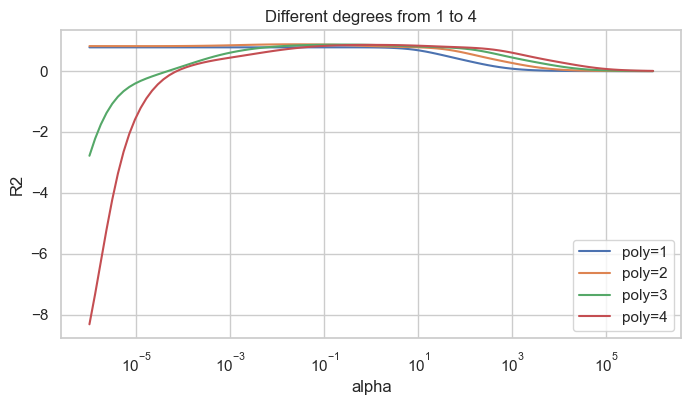

In [101]:
plt.title("Different degrees from 1 to 4")
plt.plot(alphas, best_model_1.cv_results_["mean_test_score"], label="poly=1")
plt.plot(alphas, best_model_2.cv_results_["mean_test_score"], label="poly=2")
plt.plot(alphas, best_model_3.cv_results_["mean_test_score"], label="poly=3")
plt.plot(alphas, best_model_4.cv_results_["mean_test_score"], label="poly=4")
# plt.plot(alphas, best_model_5.cv_results_["mean_test_score"], label="poly=5")
# plt.plot(alphas, best_model_6.cv_results_["mean_test_score"], label="poly=6")
plt.legend()
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("R2")

При каких значениях происходит переобучение? А недообучение? Почему?

__Ответ:__ Заметно что при увеличении степени начинается переобучение, для случая малых порядков альфа, так как скор сильно уменьшается. Это связано с тем что добавляя более сложные фичи модель усложняется и обобщающая способность падает, и при этом влияние регулиризации минимально.

При увеличении коэф-та регулиризации модель начинает недобучиваться (10^1 для 1ой степени и 10^3 для 6ой степени)  раньше в случае малых степеней(скор начинает раньше уменьшаться в зависимости от альфы). Это связано с тем, что увеличивая альфа мы упрощаем модель и модели использующие небольшие значения степени заведомо проще.

Text(0, 0.5, 'R2')

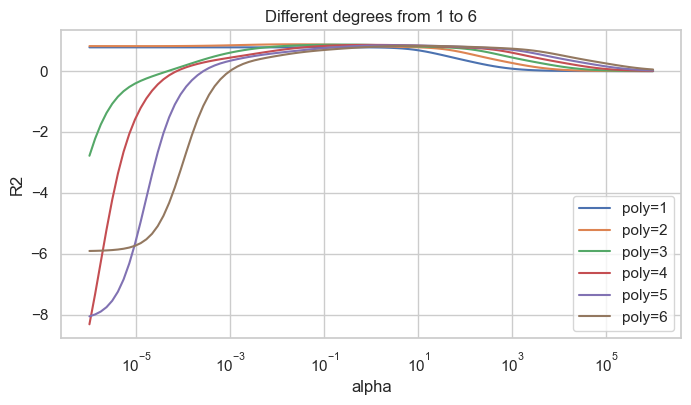

In [116]:
plt.title("Different degrees from 1 to 6")
plt.plot(alphas, best_model_1.cv_results_["mean_test_score"], label="poly=1")
plt.plot(alphas, best_model_2.cv_results_["mean_test_score"], label="poly=2")
plt.plot(alphas, best_model_3.cv_results_["mean_test_score"], label="poly=3")
plt.plot(alphas, best_model_4.cv_results_["mean_test_score"], label="poly=4")
plt.plot(alphas, best_model_5.cv_results_["mean_test_score"], label="poly=5")
plt.plot(alphas, best_model_6.cv_results_["mean_test_score"], label="poly=6")
plt.legend()
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("R2")